In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
import squarify

In [2]:
df = pd.read_csv("Datasets/used_cars_data.csv", low_memory = False)

In [3]:
#df

In [4]:
#print(df.dtypes.unique())

In [5]:
#df.describe()

In [213]:
print(df.isnull().sum())

vin                           0
back_legroom             159269
bed                     2980472
bed_height              2570942
bed_length              2570942
                         ...   
wheel_system             146732
wheel_system_display     146732
wheelbase                159269
width                    159269
year                          0
Length: 66, dtype: int64


In [7]:
#msno.matrix(df)

In [212]:
df.shape

(3000040, 66)

In [166]:
columns_to_drop = ['vin','bed','bed_height','bed_length','cabin','combine_fuel_economy','city','vehicle_damage_category','description',
                  'is_certified', 'is_cpo','is_oemcpo','listed_date','interior_color','main_picture_url','longitude','latitude','franchise_make',
                  'sp_name','trim_name','trimId','vehicle_damage_category','theft_title','wheel_system_display','engine_cylinders',
                  'exterior_color','major_options','dealer_zip','sp_id','salvage','model_name','is_new','listing_id','power','transmission',
                  'back_legroom','front_legroom','height','length','width','wheelbase','daysonmarket','savings_amount','seller_rating']

df1 = df.drop(columns=columns_to_drop)

In [167]:
df1.shape

(3000040, 23)

In [168]:
df1.dropna(inplace = True)

In [169]:
df1 = pd.concat([df1.drop('price', axis=1), df1['price']], axis=1)

In [214]:
df1.columns

Index(['body_type', 'city_fuel_economy', 'engine_displacement', 'engine_type',
       'fleet', 'frame_damaged', 'franchise_dealer', 'fuel_tank_volume',
       'fuel_type', 'has_accidents', 'highway_fuel_economy', 'horsepower',
       'isCab', 'listing_color', 'make_name', 'maximum_seating', 'mileage',
       'owner_count', 'torque', 'transmission_display', 'wheel_system', 'year',
       'price'],
      dtype='object')

In [215]:
df1.dtypes

body_type                object
city_fuel_economy       float64
engine_displacement     float64
engine_type              object
fleet                    object
frame_damaged            object
franchise_dealer           bool
fuel_tank_volume         object
fuel_type                object
has_accidents            object
highway_fuel_economy    float64
horsepower              float64
isCab                    object
listing_color            object
make_name                object
maximum_seating          object
mileage                 float64
owner_count             float64
torque                   object
transmission_display     object
wheel_system             object
year                      int64
price                   float64
dtype: object

In [170]:
df2 = df1

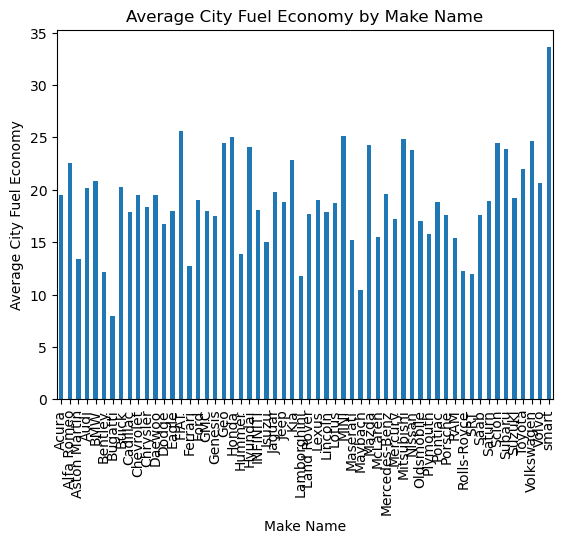

In [171]:
# Average city fuel economy by make_name
avg_fuel_economy = df2.groupby('make_name')['city_fuel_economy'].mean()
avg_fuel_economy.plot(kind='bar')
plt.xlabel('Make Name')
plt.ylabel('Average City Fuel Economy')
plt.title('Average City Fuel Economy by Make Name')
plt.show()


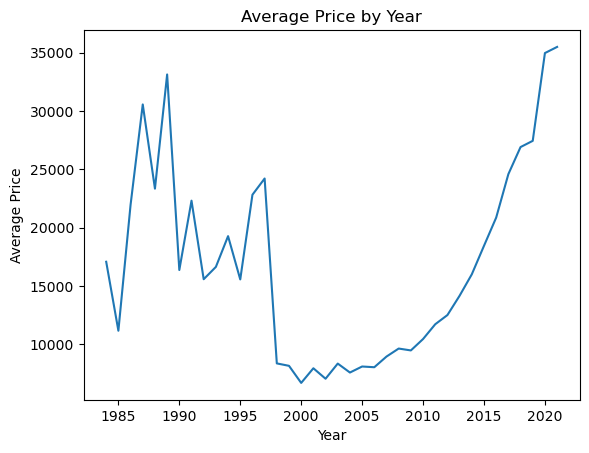

In [172]:
# Average price by year
avg_price_year = df2.groupby('year')['price'].mean()
avg_price_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price by Year')
plt.show()


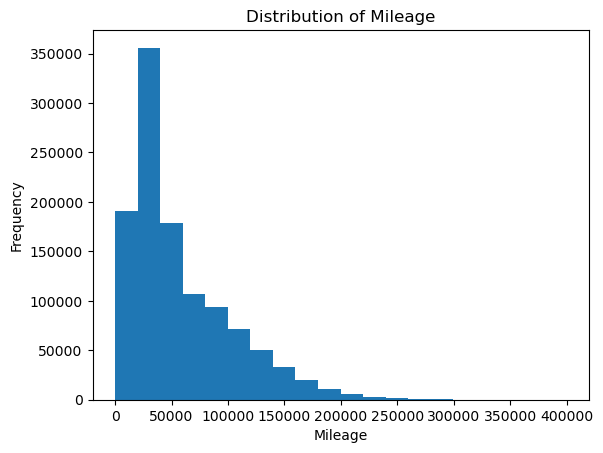

In [173]:
# Histogram of mileage
df2['mileage'].plot(kind='hist', bins=20)
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Distribution of Mileage')
plt.show()


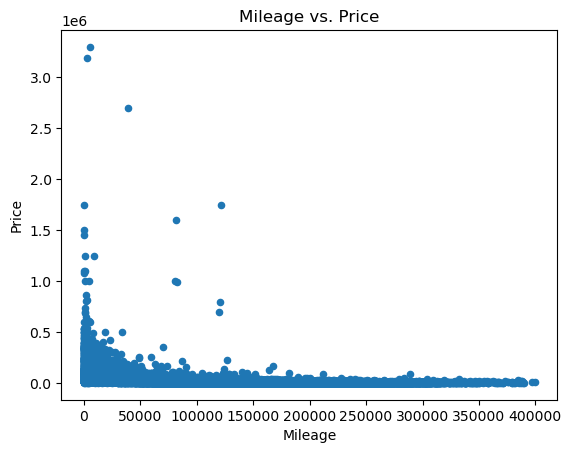

In [174]:
# Scatter plot of mileage vs price
df2.plot(kind='scatter', x='mileage', y='price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price')
plt.show()


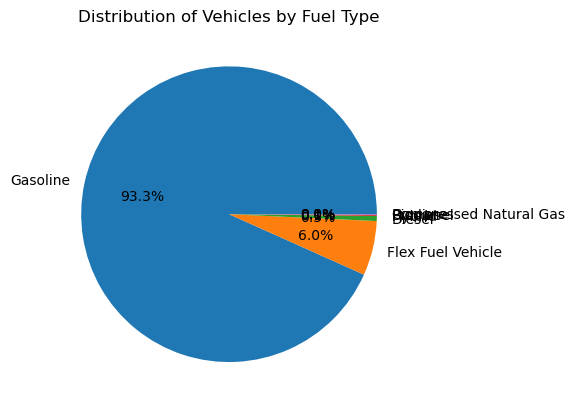

In [175]:
# Pie chart of vehicle distribution by fuel_type
df2['fuel_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Vehicles by Fuel Type')
plt.ylabel('')
plt.show()


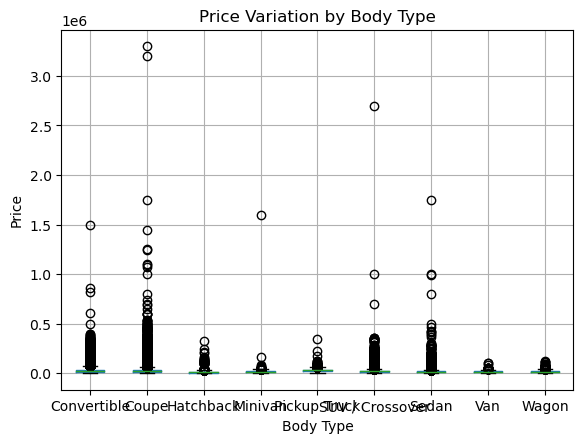

In [176]:
# Box plot of price variation by body type
df2.boxplot(column='price', by='body_type')
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.title('Price Variation by Body Type')
plt.suptitle('')  # Suppress the automatic title
plt.show()


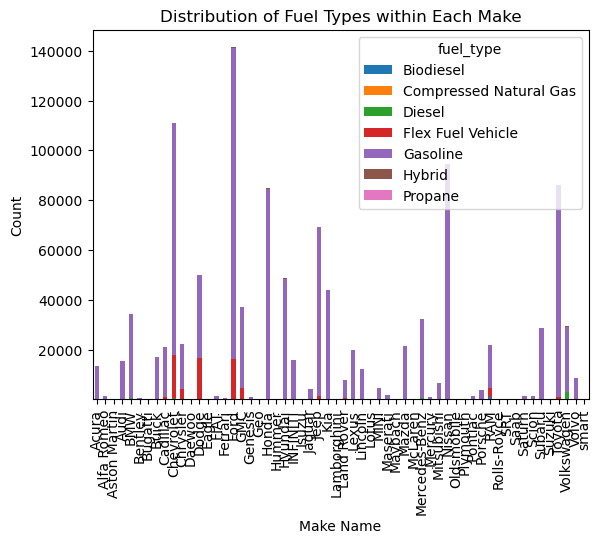

In [177]:
df2.groupby(['make_name', 'fuel_type']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Make Name')
plt.ylabel('Count')
plt.title('Distribution of Fuel Types within Each Make')
plt.show()


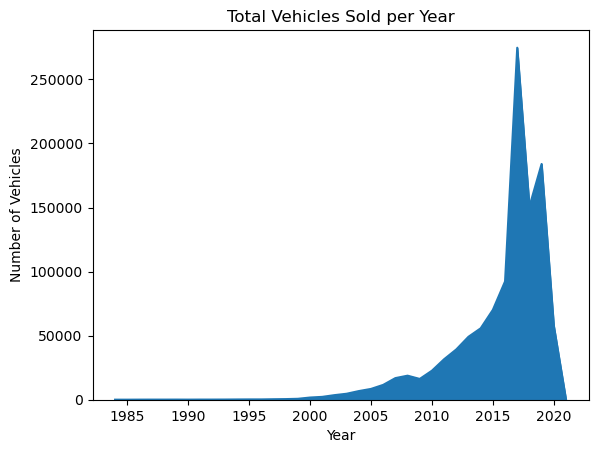

In [178]:
df2.groupby('year').size().plot(kind='area')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Total Vehicles Sold per Year')
plt.show()


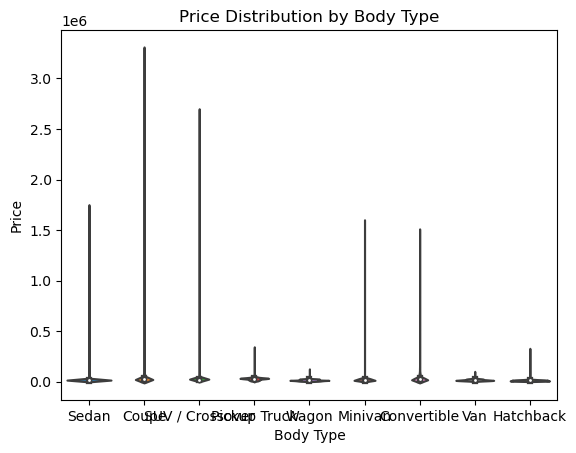

In [179]:
import seaborn as sns
sns.violinplot(x=df2['body_type'], y=df2['price'])
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.title('Price Distribution by Body Type')
plt.show()


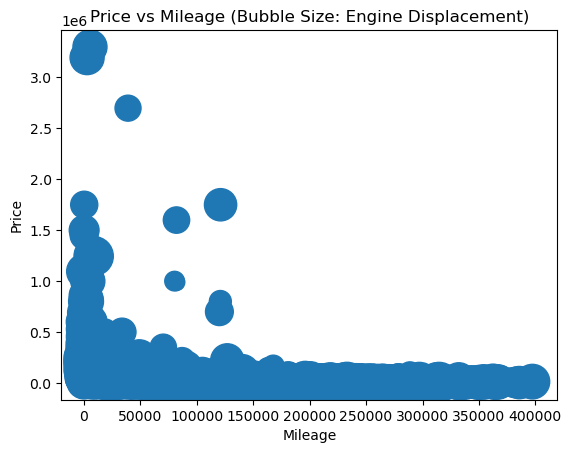

In [180]:
plt.scatter(df2['mileage'], df2['price'], s=df2['engine_displacement']/10)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price vs Mileage (Bubble Size: Engine Displacement)')
plt.show()


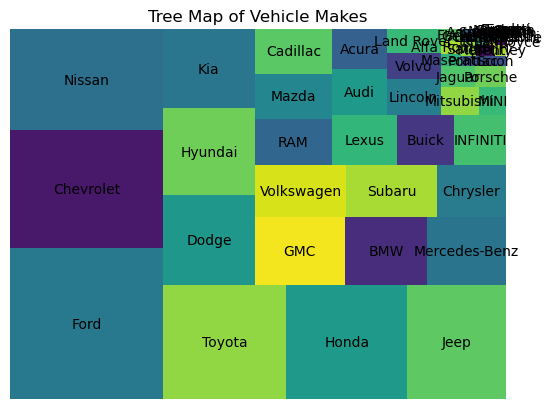

In [181]:
sizes = df2['make_name'].value_counts()
squarify.plot(sizes, label=sizes.index)
plt.axis('off')
plt.title('Tree Map of Vehicle Makes')
plt.show()


C:\Users\hetan\.conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


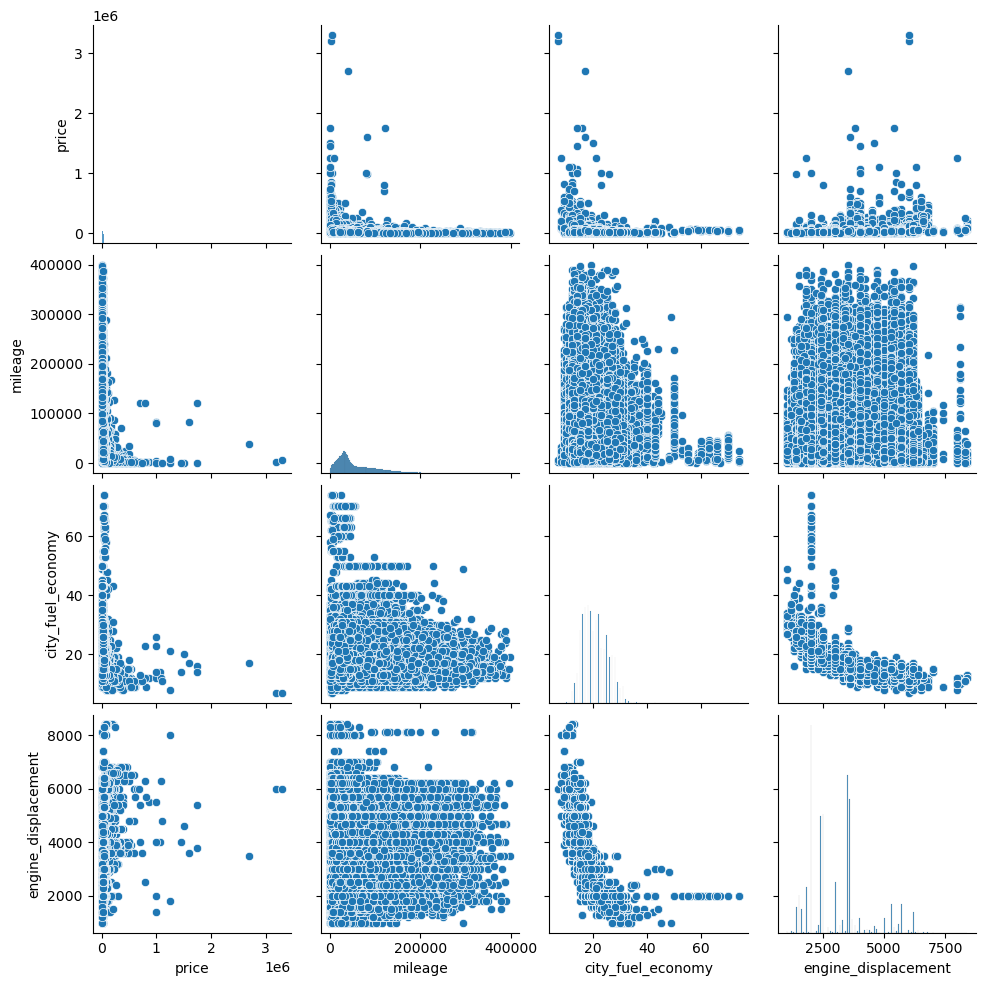

In [182]:
sns.pairplot(df2, vars=['price', 'mileage', 'city_fuel_economy', 'engine_displacement'], kind='scatter')
plt.show()


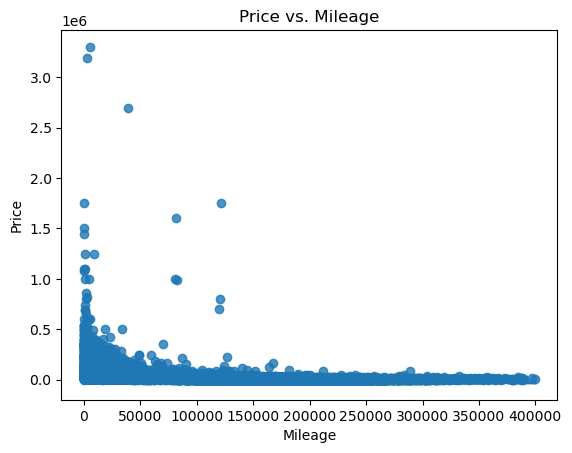

In [183]:
sns.regplot(x='mileage', y='price', data=df2)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price vs. Mileage')
plt.show()


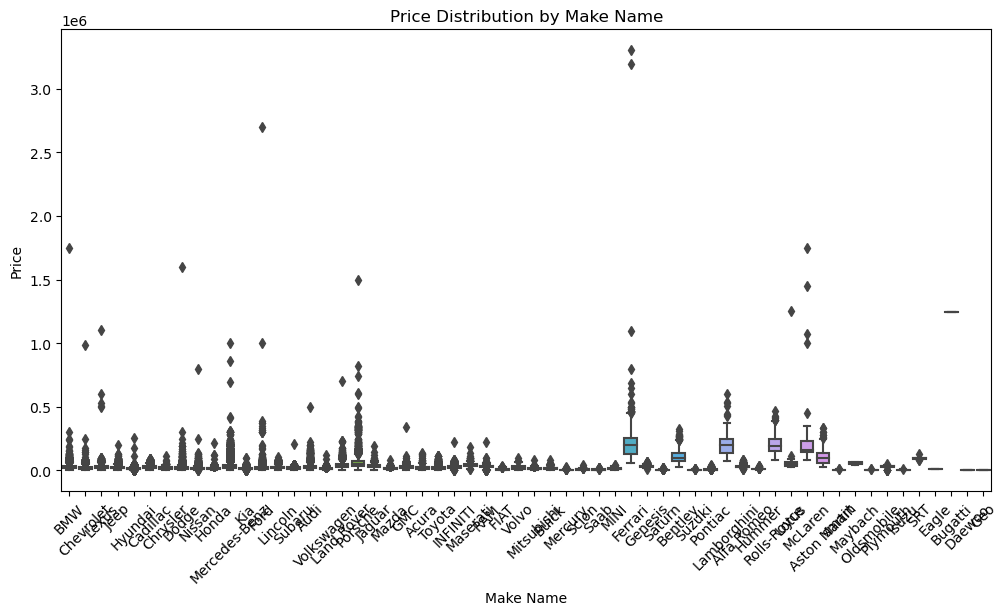

In [184]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='make_name', y='price', data=df2)
plt.xticks(rotation=45)
plt.xlabel('Make Name')
plt.ylabel('Price')
plt.title('Price Distribution by Make Name')
plt.show()


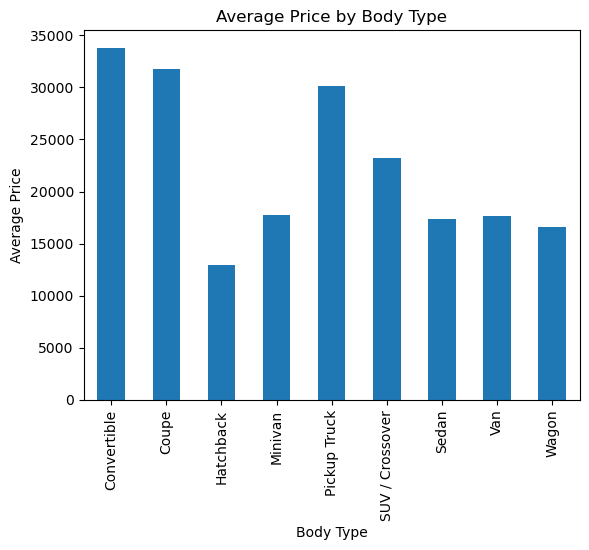

In [185]:
mean_prices = df2.groupby('body_type')['price'].mean()
mean_prices.plot(kind='bar')
plt.xlabel('Body Type')
plt.ylabel('Average Price')
plt.title('Average Price by Body Type')
plt.show()


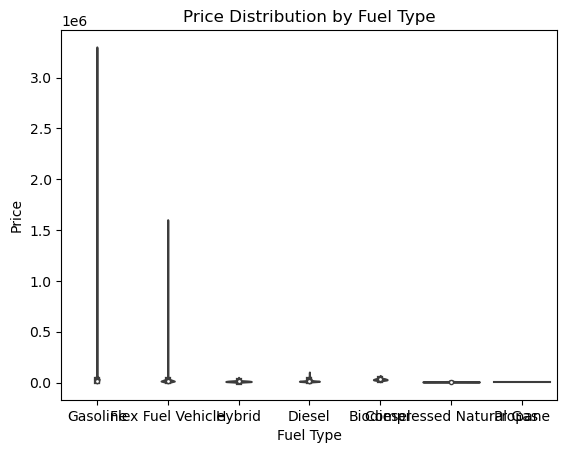

In [186]:
sns.violinplot(x='fuel_type', y='price', data=df2)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Price Distribution by Fuel Type')
plt.show()


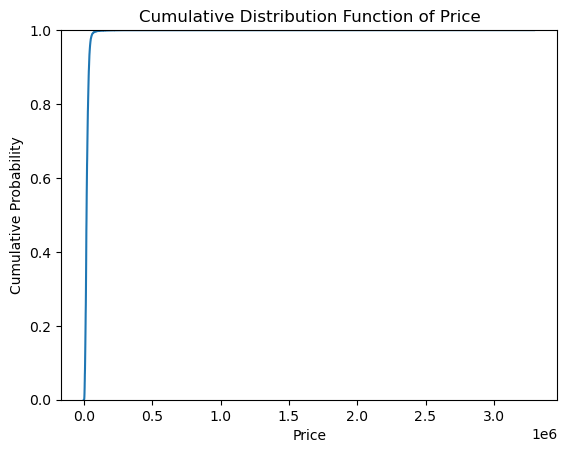

In [187]:
sns.ecdfplot(df2['price'])
plt.xlabel('Price')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function of Price')
plt.show()


In [188]:
Q1 = df2['price'].quantile(0.05)
Q3 = df2['price'].quantile(0.80)
IQR = Q3 - Q1

# Defining limits for outlier
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtering out the outliers
df2_filtered = df2[(df2['price'] >= lower_limit) & (df2['price'] <= upper_limit)]


In [189]:
df2_filtered

,body_type,city_fuel_economy,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,fuel_tank_volume,fuel_type,has_accidents,...,listing_color,make_name,maximum_seating,mileage,owner_count,torque,transmission_display,wheel_system,year,price
12,Sedan,22.0,3000.0,I6,False,False,True,15.8 gal,Gasoline,False,...,SILVER,BMW,5 seats,6903.0,2.0,"330 lb-ft @ 1,380 RPM",8-Speed Automatic,AWD,2016,58995.0
38,Sedan,27.0,1500.0,I4,True,False,True,15.8 gal,Gasoline,False,...,SILVER,Chevrolet,5 seats,42394.0,1.0,"184 lb-ft @ 2,500 RPM",6-Speed Automatic,FWD,2018,14639.0
40,Coupe,18.0,3500.0,V6,False,False,True,17.4 gal,Gasoline,False,...,BLACK,Lexus,4 seats,62251.0,1.0,"280 lb-ft @ 4,800 RPM",6-Speed Automatic,AWD,2018,32000.0
41,SUV / Crossover,18.0,3600.0,V6,False,False,True,19.4 gal,Gasoline,False,...,SILVER,Chevrolet,8 seats,36410.0,1.0,"266 lb-ft @ 2,800 RPM",9-Speed Automatic,FWD,2018,23723.0
45,SUV / Crossover,15.0,3600.0,V6,False,False,True,22 gal,Gasoline,True,...,SILVER,Chevrolet,8 seats,36055.0,1.0,"266 lb-ft @ 3,400 RPM",6-Speed Automatic,AWD,2017,22422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000028,SUV / Crossover,26.0,2500.0,H4,False,False,True,15.9 gal,Gasoline,False,...,SILVER,Subaru,5 seats,20160.0,1.0,"174 lb-ft @ 4,100 RPM",Continuously Variable Transmission,AWD,2017,20700.0
3000031,Sedan,26.0,2500.0,I4,True,False,True,18 gal,Gasoline,False,...,BLACK,Nissan,5 seats,62138.0,1.0,"177 lb-ft @ 4,000 RPM",Continuously Variable Transmission,FWD,2018,17700.0
3000034,Pickup Truck,18.0,3500.0,V6,False,False,True,21.1 gal,Gasoline,False,...,WHITE,Toyota,5 seats,20009.0,1.0,"265 lb-ft @ 4,600 RPM",6-Speed Automatic,4WD,2017,40993.0
3000038,Sedan,30.0,2000.0,I4 Diesel,False,False,False,14.8 gal,Diesel,False,...,GREEN,Jaguar,5 seats,27857.0,1.0,"318 lb-ft @ 1,750 RPM",Automatic,AWD,2017,26998.0


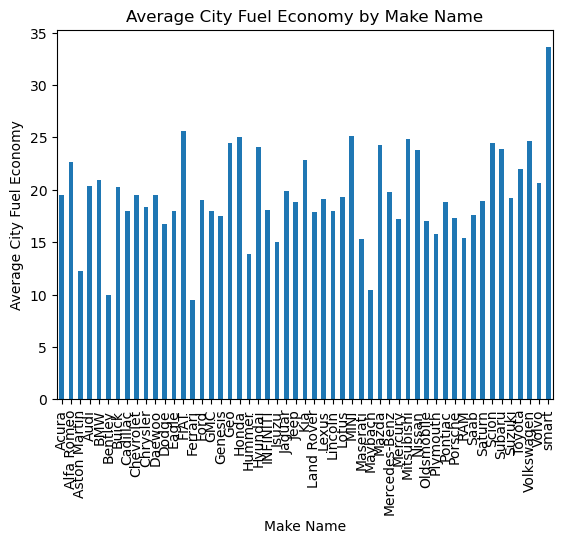

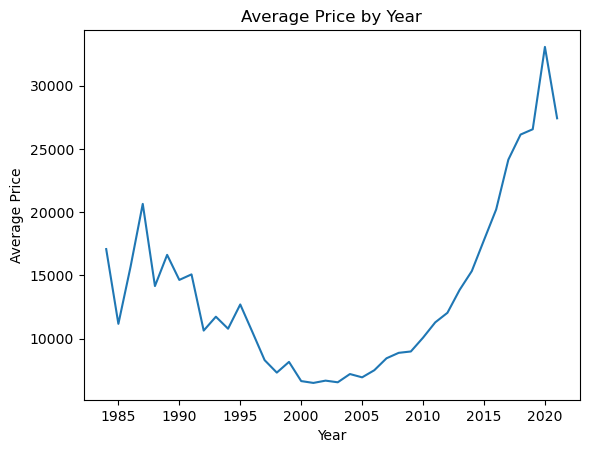

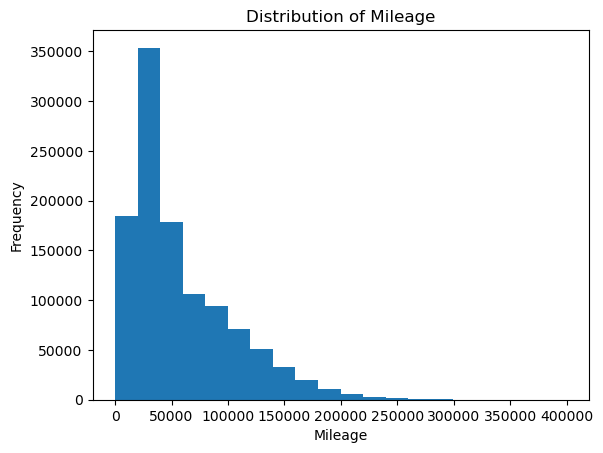

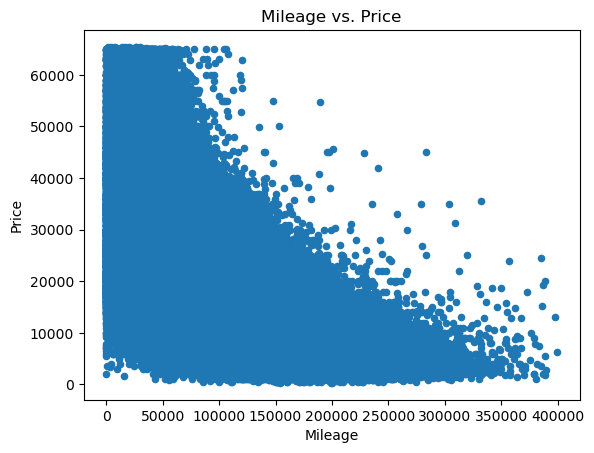

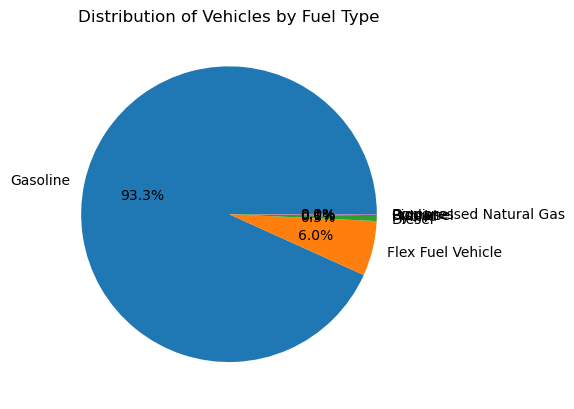

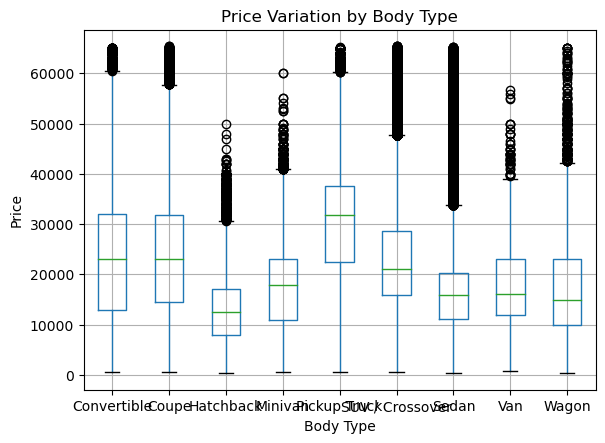

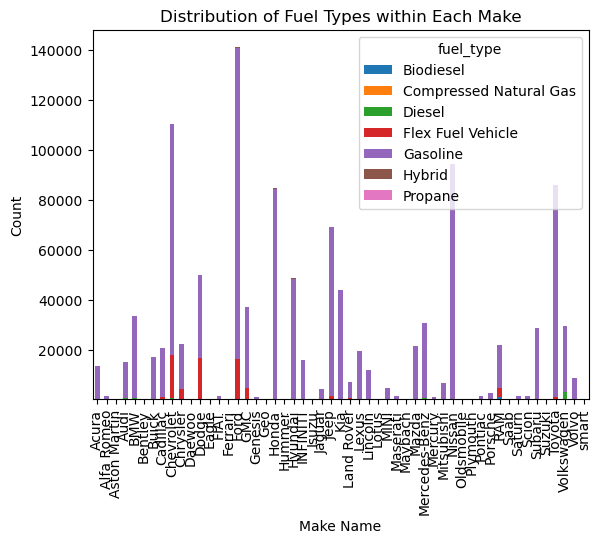

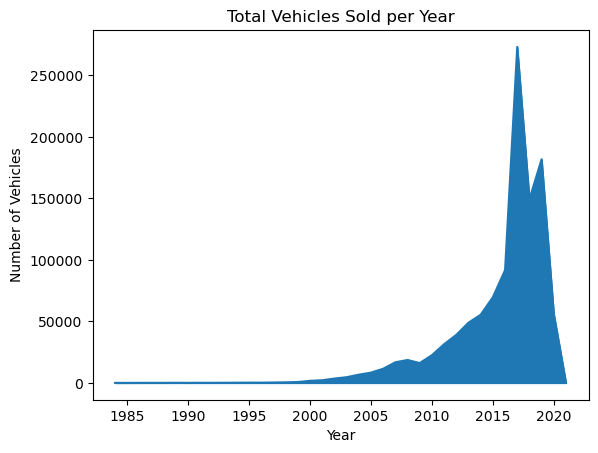

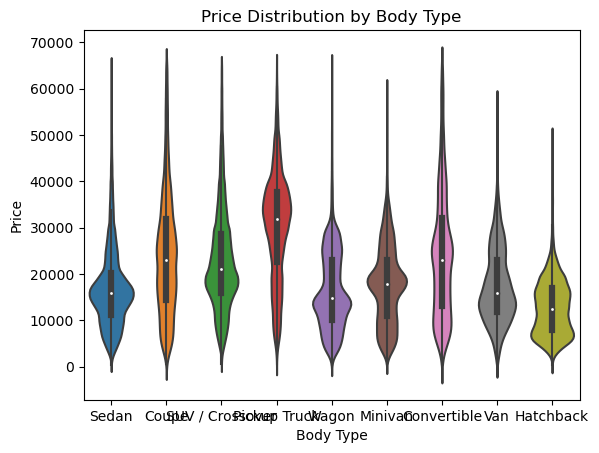

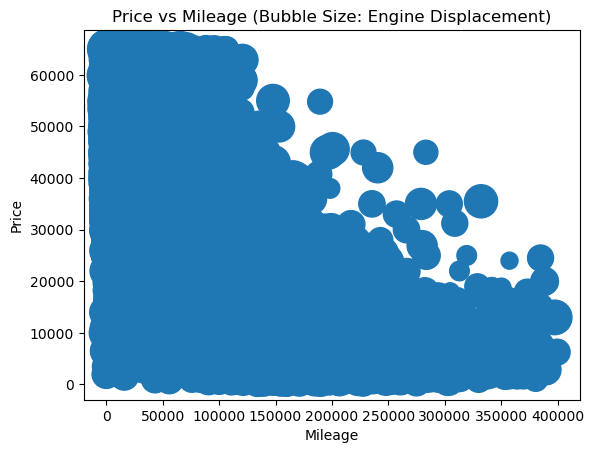

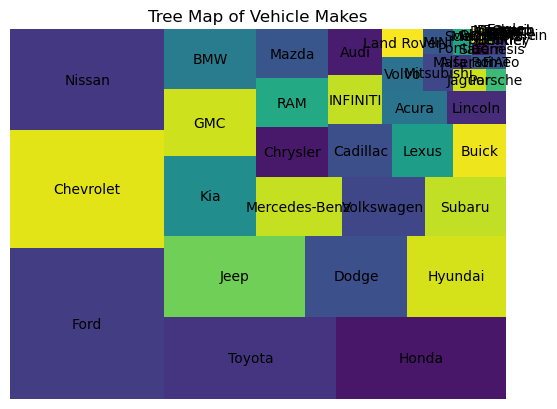

C:\Users\hetan\.conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


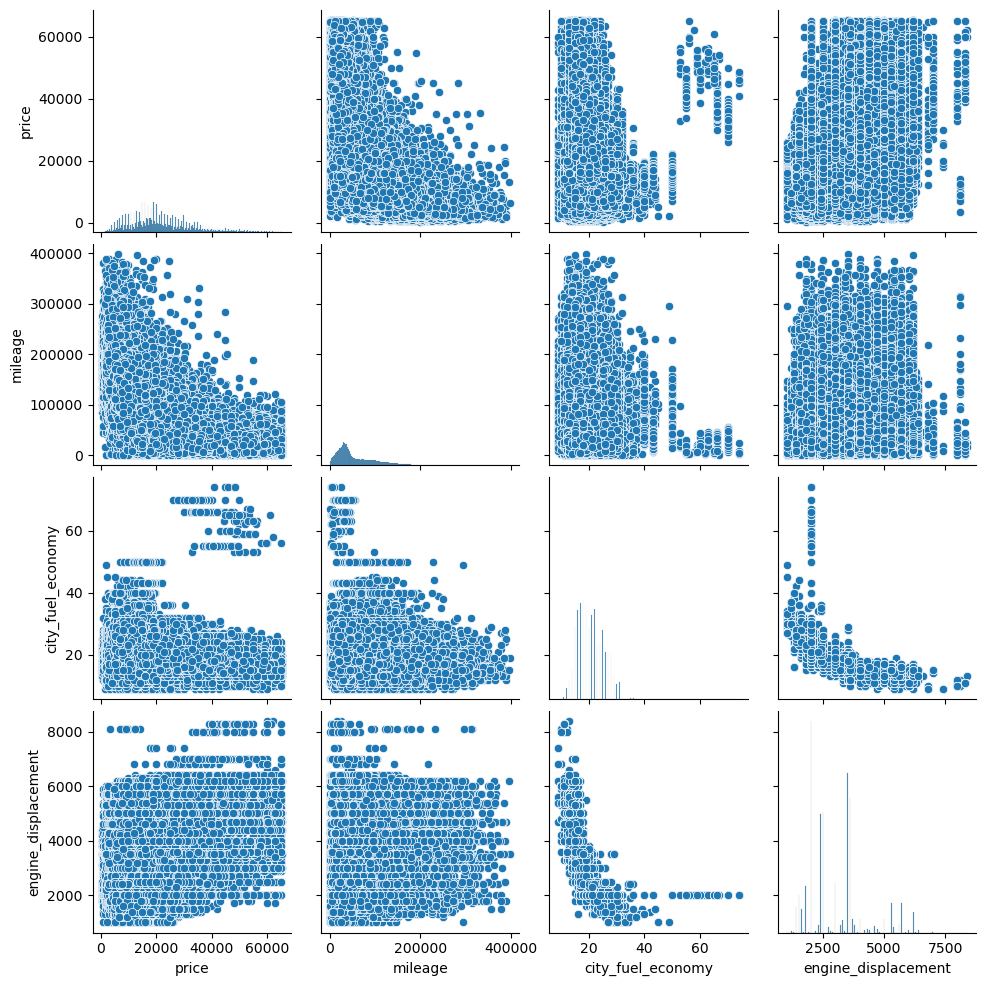

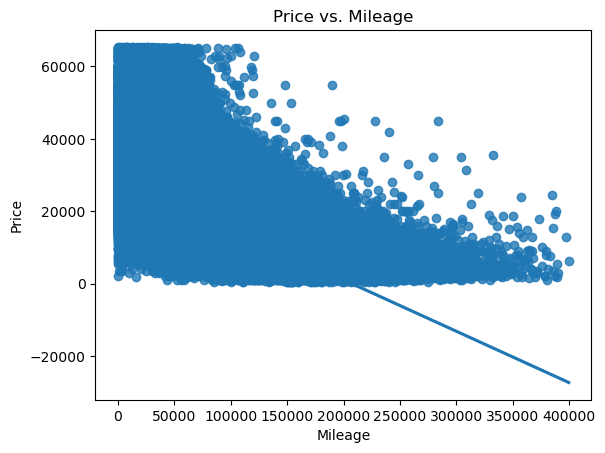

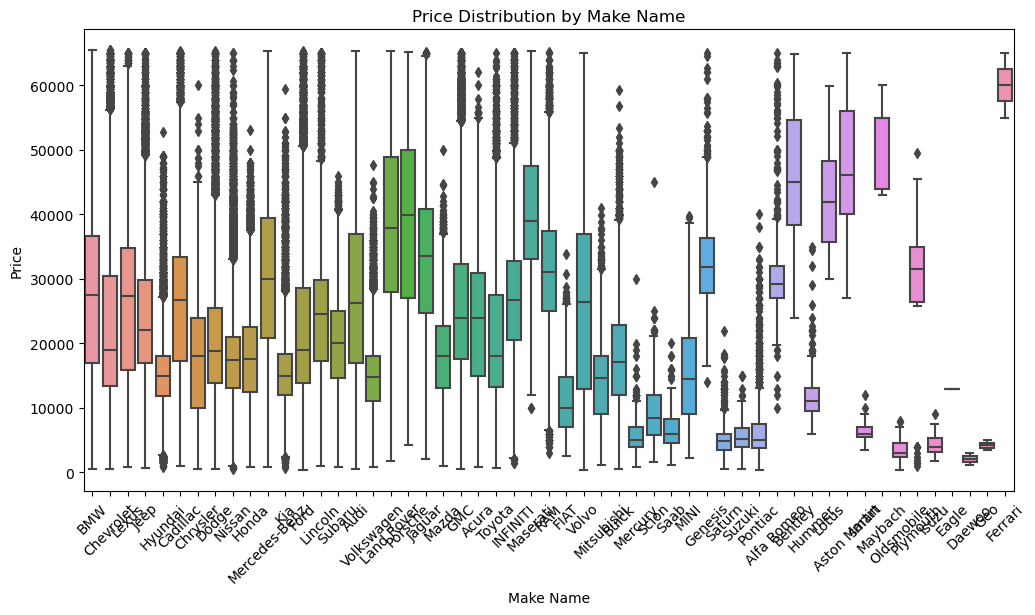

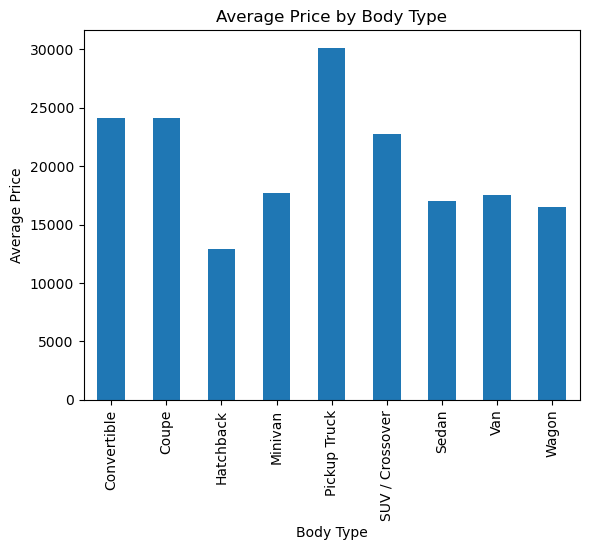

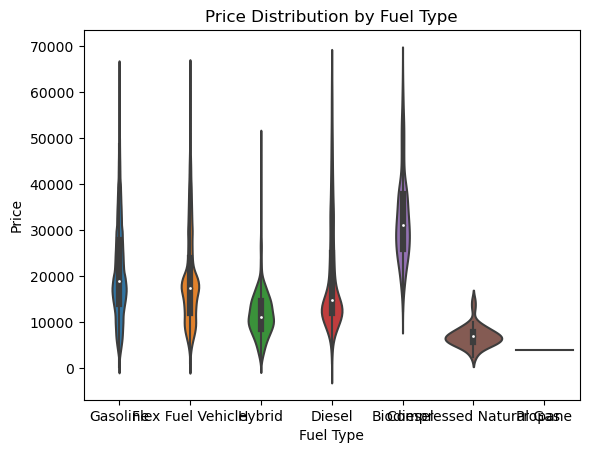

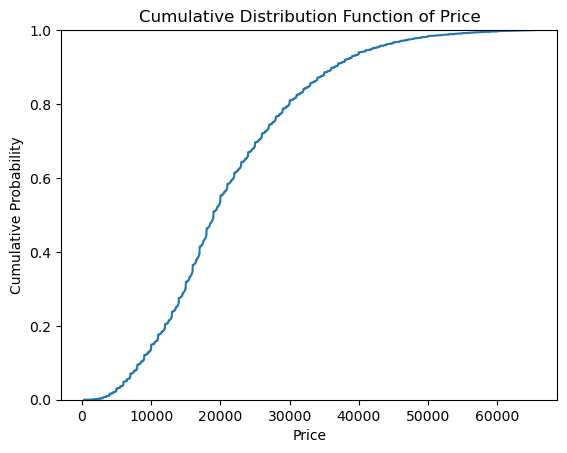

In [190]:
# Average city fuel economy by make_name
avg_fuel_economy = df2_filtered.groupby('make_name')['city_fuel_economy'].mean()
avg_fuel_economy.plot(kind='bar')
plt.xlabel('Make Name')
plt.ylabel('Average City Fuel Economy')
plt.title('Average City Fuel Economy by Make Name')
plt.show()


# Average price by year
avg_price_year = df2_filtered.groupby('year')['price'].mean()
avg_price_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price by Year')
plt.show()


# Histogram of mileage
df2_filtered['mileage'].plot(kind='hist', bins=20)
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Distribution of Mileage')
plt.show()


# Scatter plot of mileage vs price
df2_filtered.plot(kind='scatter', x='mileage', y='price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price')
plt.show()


# Pie chart of vehicle distribution by fuel_type
df2_filtered['fuel_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Vehicles by Fuel Type')
plt.ylabel('')
plt.show()


# Box plot of price variation by body type
df2_filtered.boxplot(column='price', by='body_type')
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.title('Price Variation by Body Type')
plt.suptitle('')  # Suppress the automatic title
plt.show()


df2_filtered.groupby(['make_name', 'fuel_type']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Make Name')
plt.ylabel('Count')
plt.title('Distribution of Fuel Types within Each Make')
plt.show()


df2_filtered.groupby('year').size().plot(kind='area')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Total Vehicles Sold per Year')
plt.show()



sns.violinplot(x=df2_filtered['body_type'], y=df2_filtered['price'])
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.title('Price Distribution by Body Type')
plt.show()


plt.scatter(df2_filtered['mileage'], df2_filtered['price'], s=df2_filtered['engine_displacement']/10)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price vs Mileage (Bubble Size: Engine Displacement)')
plt.show()



sizes = df2_filtered['make_name'].value_counts()
squarify.plot(sizes, label=sizes.index)
plt.axis('off')
plt.title('Tree Map of Vehicle Makes')
plt.show()




sns.pairplot(df2_filtered, vars=['price', 'mileage', 'city_fuel_economy', 'engine_displacement'], kind='scatter')
plt.show()


sns.regplot(x='mileage', y='price', data=df2_filtered)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price vs. Mileage')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='make_name', y='price', data=df2_filtered)
plt.xticks(rotation=45)
plt.xlabel('Make Name')
plt.ylabel('Price')
plt.title('Price Distribution by Make Name')
plt.show()


mean_prices = df2_filtered.groupby('body_type')['price'].mean()
mean_prices.plot(kind='bar')
plt.xlabel('Body Type')
plt.ylabel('Average Price')
plt.title('Average Price by Body Type')
plt.show()


sns.violinplot(x='fuel_type', y='price', data=df2_filtered)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Price Distribution by Fuel Type')
plt.show()


sns.ecdfplot(df2_filtered['price'])
plt.xlabel('Price')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function of Price')
plt.show()


In [191]:
df2_filtered['torque'] = df2_filtered['torque'].str.extract(r'@ (\d+,\d+) RPM', expand=False)

# Convert RPM values to numeric (remove commas and convert to integer)
df2_filtered['torque'] = pd.to_numeric(df2_filtered['torque'].str.replace(',', ''), errors='coerce')

df2_filtered['torque'].unique()

#Inline = 1
#V-shaped = 2
#Hybrid = 3
#W-Shaped = 4
#rotatry = 5
engine_type_mapping = {
    'I4': 1,
    'V6': 3,
    'V8': 4,
    'V6 Flex Fuel Vehicle': 5,
    'H4': 6,
    'V8 Flex Fuel Vehicle': 7,
    'I6': 8,
    'I4 Flex Fuel Vehicle': 9,
    'I5': 10,
    'I4 Diesel': 11,
    'I3': 12,
    'H6': 13,
    'V6 Diesel': 14,
    'V6 Biodiesel': 15,
    'I4 Hybrid': 16,
    'V12': 17,
    'I6 Diesel': 18,
    'V10': 19,
    'W12': 20,
    'H4 Hybrid': 21,
    'W12 Flex Fuel Vehicle': 22,
    'V6 Hybrid': 23,
    'I4 Compressed Natural Gas': 24,
    'R2': 25,
    'I6 Hybrid': 26,
    'I5 Diesel': 27,
    'W8': 28,
    'V8 Compressed Natural Gas': 29,
    'V8 Hybrid': 30,
    'I3 Hybrid': 31,
    'V10 Diesel': 32,
    'V8 Propane': 33,
    'W16': 34,
    'V6 Compressed Natural Gas': 35,
}

df2_filtered['engine_type'] = df2_filtered['engine_type'].map(engine_type_mapping)
########
#df2_filtered['engine_type'] = df2_filtered['engine_type'].astype('category')

print(df2_filtered['engine_type'].value_counts())

df2_filtered['make_name'] = df2_filtered['make_name'].apply(lambda x : x.lower().replace(' ', '_').replace('-', '_'))

brand_category_mapping = {
    'chevrolet': 1,   # normal
    'lexus': 2,       # luxury
    'jeep': 3,        # normal
    'hyundai': 4,     # normal
    'cadillac': 5,    # luxury
    'chrysler': 6,    # normal
    'dodge': 7,       # normal
    'nissan': 8,      # normal
    'honda': 9,       # normal
    'mercedes_benz': 10,  # luxury
    'kia': 11,         # normal
    'ford': 12,        # normal
    'lincoln': 13,     # luxury
    'subaru': 14,      # normal
    'bmw': 15,         # luxury
    'audi': 16,        # luxury
    'volkswagen': 17,  # normal
    'land_rover': 18,  # luxury
    'porsche': 19,     # sports
    'jaguar': 20,      # luxury
    'mazda': 21,       # normal
    'gmc': 22,         # normal
    'acura': 23,       # luxury
    'toyota': 24,      # normal
    'infiniti': 25,    # luxury
    'maserati': 26,    # sports
    'ram': 27,         # normal
    'fiat': 28,        # normal
    'volvo': 29,       # luxury
    'mitsubishi': 30,  # normal
    'buick': 31,       # luxury
    'mercury': 32,     # normal
    'scion': 33,       # normal
    'saab': 34,        # luxury
    'mini': 35,        # luxury
    'ferrari': 36,     # sports
    'genesis': 37,     # luxury
    'saturn': 38,      # normal
    'bentley': 39,     # luxury
    'suzuki': 40,      # normal
    'pontiac': 41,     # normal
    'lamborghini': 42, # sports
    'alfa_romeo': 43,  # sports
    'hummer': 44,      # luxury
    'rolls_royce': 45, # luxury
    'lotus': 46,       # sports
    'mclaren': 47,     # sports
    'aston_martin': 48, # luxury
    'smart': 49,       # normal
    'maybach': 50,     # luxury
    'oldsmobile': 51,  # normal
    'plymouth': 52,    # normal
    'isuzu': 53,       # normal
    'srt': 54,         # sports
    'eagle': 55,       # normal
    'bugatti': 56,     # sports
    'daewoo': 57,      # normal
    'geo': 58          # normal
}

# Apply the mapping to create a new column 'brand_category_numeric'
df2_filtered['make_name'] = df2_filtered['make_name'].map(brand_category_mapping)
#df2_filtered['make_name'] = df2_filtered['make_name'].astype('category')

body_type_mapping = {
    'Sedan': 1,
    'Coupe': 2,
    'SUV / Crossover': 3,
    'Pickup Truck': 4,
    'Wagon': 5,
    'Minivan': 6,
    'Convertible': 7,
    'Van': 8,
    'Hatchback': 9
}

# Apply the mapping to create a new column 'body_type_numeric'
df2_filtered['body_type'] = df2_filtered['body_type'].map(body_type_mapping)

#df2_filtered['body_type'] = df2_filtered['body_type'].astype('category')

#df2_filtered['fleet'] = df2_filtered['fleet'].astype('category')

#df2_filtered['frame_damaged'] = df2_filtered['frame_damaged'].astype('category')

#df2_filtered['franchise_dealer'] = df2_filtered['franchise_dealer'].astype('category')

df2_filtered['fuel_tank_volume'] = pd.to_numeric(df2_filtered['fuel_tank_volume'].str.replace(' gal', ''), errors='coerce')

#df2_filtered['isCab'] = df['isCab'].astype('category')

fuel_type_mapping = {
    'Gasoline': 1,
    'Flex Fuel Vehicle': 2,
    'Hybrid': 3,
    'Diesel': 4,
    'Biodiesel': 5,
    'Compressed Natural Gas': 6,
    'Propane': 7
}

# Apply the mapping to create a new column 'fuel_type_numeric'
df2_filtered['fuel_type'] = df2_filtered['fuel_type'].map(fuel_type_mapping)

#df2_filtered['has_accidents'] = df2_filtered['has_accidents'].astype('category')

color_mapping = {
    'BLACK': 1,
    'WHITE': 2,
    'SILVER': 3,
    'GRAY': 4,
    'UNKNOWN': 5,
    'RED': 6,
    'BLUE': 7,
    'BROWN': 8,
    'GREEN': 9,
    'GOLD': 10,
    'ORANGE': 11,
    'YELLOW': 12,
    'TEAL': 13,
    'PURPLE': 14,
    'PINK': 15
}

# Apply the mapping to create a new column 'color_numeric'
df2_filtered['listing_color'] = df2_filtered['listing_color'].map(color_mapping)

#df2_filtered['listing_color'] = df2_filtered['listing_color'].astype('category')

seating_mapping = {
    '5 seats': 1,
    '7 seats': 2,
    '8 seats': 3,
    '6 seats': 4,
    '4 seats': 5,
    '2 seats': 6,
    '3 seats': 7,
    '9 seats': 8,
    '15 seats': 9,
    '12 seats': 10,
    '--': 0,
    '10 seats': 12
}

# Apply the mapping to create a new column 'seating_numeric'
df2_filtered['maximum_seating'] = df2_filtered['maximum_seating'].map(seating_mapping)


#df2_filtered['maximum_seating'] = df2_filtered['maximum_seating'].astype('category')

#df2_filtered['wheel_system'] = df2_filtered['wheel_system'].astype('category')

transmission_mapping = {
    '6-Speed Automatic': 'Automatic',
    '9-Speed Automatic': 'Power Automatic',
    '8-Speed Automatic': 'Power Automatic',
    '6-Speed Manual': 'Manual',
    '5-Speed Automatic': 'Automatic',
    '6-Speed Automatic Overdrive': 'Automatic',
    'Continuously Variable Transmission': 'CVT',
    'Automatic': 'Automatic',
    'Manual': 'Manual',
    '7-Speed Automatic': 'Power Automatic',
    '4-Speed Automatic': 'Automatic',
    '5-Speed Manual': 'Manual',
    '6-Speed Dual Clutch': 'Automatic',
    '7-Speed CVT': 'CVT',
    '7-Speed Dual Clutch': 'Automatic',
    '8-Speed Dual Clutch': 'Power Automatic',
    '8-Speed CVT': 'Power CVT',
    '6-Speed CVT': 'CVT',
    '5-Speed Automatic Overdrive': 'Automatic',
    '4-Speed Automatic Overdrive': 'Automatic',
    '7-Speed Manual': 'Manual',
    '10-Speed Automatic': 'Power Automatic',
    '6-Speed Manual Overdrive': 'Manual',
    '8-Speed Manual': 'Power Manual',
    '3-Speed Automatic': 'Automatic',
    '9-Speed Automatic Overdrive': 'Power Automatic',
    '5-Speed Manual Overdrive': 'Manual',
    '7-Speed Automatic Overdrive': 'Automatic',
    '8-Speed Automatic Overdrive': 'Power Automatic',
    '4-Speed Manual': 'Manual',
    '5-Speed Dual Clutch': 'Automatic',
    '2-Speed Automatic': 'Automatic',
    '1-Speed CVT': 'CVT'
}

df2_filtered['transmission_display'] = df2_filtered['transmission_display'].map(transmission_mapping)


transmission_mapping = {
    'Automatic': 1,
    'Power Automatic': 2,
    'Manual': 3,
    'CVT': 4,
    'Power CVT': 5
}

# Apply the mapping to create a new column 'transmission_numeric'
df2_filtered['transmission_display'] = df2_filtered['transmission_display'].map(transmission_mapping)
#df2_filtered['transmission_display'] = df2_filtered['transmission_display'].astype('category')

wheel_system_mapping = {
    'FWD': 1,
    'AWD': 2,
    '4WD': 3,
    'RWD': 4,
    '4X2': 5
}

# Apply the mapping to create a new column 'wheel_system_numeric'
df2_filtered['wheel_system'] = df2_filtered['wheel_system'].map(wheel_system_mapping)

#bins = [0,5000,10000,15000, 20000,25000, 30000,35000,40000,45000,50000, float('inf')]
#labels = [0,1,2,3,4,5,6,7,8,9,10]

#df2_filtered['price'] = pd.cut(df2_filtered['price'], bins=bins, labels=labels, include_lowest=True)
#df2_filtered['price'].unique()

#df2_filtered.dropna(inplace = True)

#df2_filtered.dtypes

C:\Users\hetan\AppData\Local\Temp\ipykernel_10916\2153895923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['torque'] = df2_filtered['torque'].str.extract(r'@ (\d+,\d+) RPM', expand=False)
C:\Users\hetan\AppData\Local\Temp\ipykernel_10916\2153895923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['torque'] = pd.to_numeric(df2_filtered['torque'].str.replace(',', ''), errors='coerce')
C:\Users\hetan\AppData\Local\Temp\ipykernel_10916\2153895923.py:50: SettingWithCopyWarning:

engine_type
1     538642
3     343990
4     100879
5      35966
6      27708
7      25443
8      16491
9       5448
10      4334
11      4217
12      3225
13      2278
14      1311
15      1006
16       911
18       580
19       152
17       143
20       137
21        91
23        73
25        37
24        36
26        16
22        11
27         8
28         3
29         3
30         3
31         3
32         2
33         2
35         1
Name: count, dtype: int64


C:\Users\hetan\AppData\Local\Temp\ipykernel_10916\2153895923.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['make_name'] = df2_filtered['make_name'].apply(lambda x : x.lower().replace(' ', '_').replace('-', '_'))
C:\Users\hetan\AppData\Local\Temp\ipykernel_10916\2153895923.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['make_name'] = df2_filtered['make_name'].map(brand_category_mapping)
C:\Users\hetan\AppData\Local\Temp\ipykernel_10916\2153895923.py:136: SettingWithCop

In [192]:
bins = [0,5000,10000,15000, 20000,25000, 30000,35000,40000,45000,50000, float('inf')]
labels = [0,1,2,3,4,5,6,7,8,9,10]

df2_filtered['price'] = pd.cut(df2_filtered['price'], bins=bins, labels=labels, include_lowest=True)
df2_filtered['price'].unique()

df2_filtered.dropna(inplace = True)


C:\Users\hetan\AppData\Local\Temp\ipykernel_10916\964994516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['price'] = pd.cut(df2_filtered['price'], bins=bins, labels=labels, include_lowest=True)
C:\Users\hetan\AppData\Local\Temp\ipykernel_10916\964994516.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered.dropna(inplace = True)


In [193]:
df2_filtered.dropna(inplace = True)

C:\Users\hetan\AppData\Local\Temp\ipykernel_10916\91377640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered.dropna(inplace = True)


Linear Regression - Real vs. Predicted Values
 R Squared: 0.7695


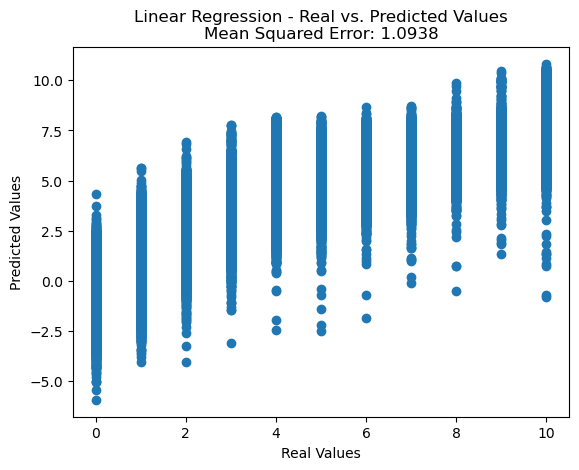

Decision Tree - Real vs. Predicted Values
 R Squared: 0.8886


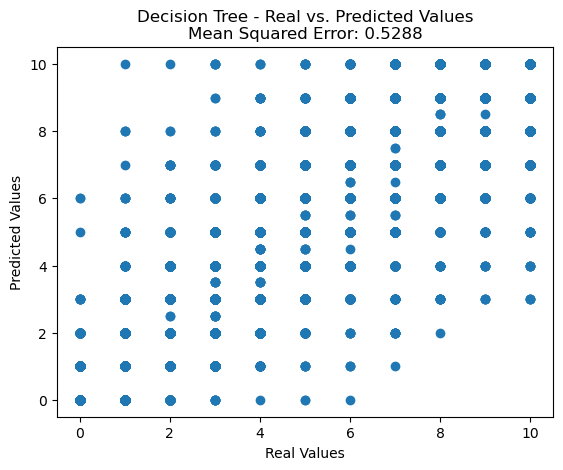

Random Forest - Real vs. Predicted Values
 R Squared: 0.9369


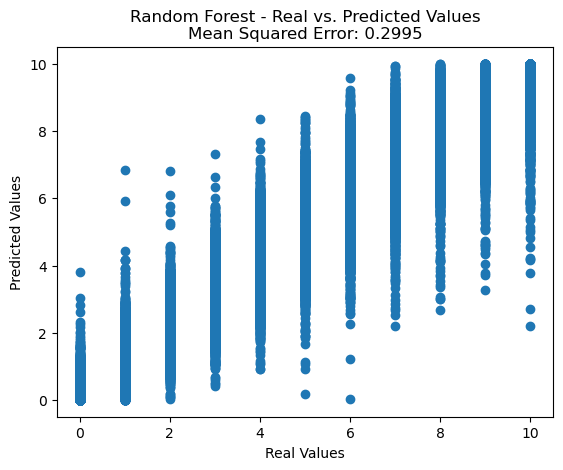

In [194]:
target_column = 'price'
features = df2_filtered.drop(columns=[target_column])
target = df2_filtered[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Define regressors
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    #'Neural Network': MLPRegressor()
}

# Loop through regressors, train models, and print performance metrics
for name, regressor in regressors.items():
    # Train the model
    regressor.fit(X_train, y_train)

    # Make predictions
    predictions = regressor.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Plot real vs. predicted values
    plt.scatter(y_test, predictions)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title(f"{name} - Real vs. Predicted Values\nMean Squared Error: {mse:.4f}")
    print(f"{name} - Real vs. Predicted Values\n R Squared: {r2:.4f}")
    plt.show()

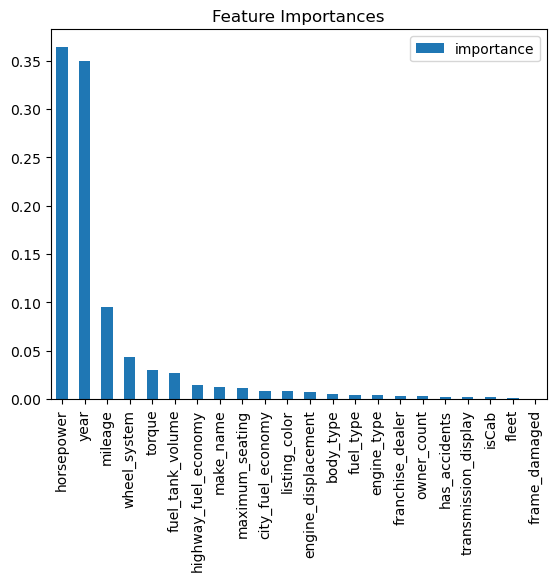

In [195]:
importances = regressor.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['importance']).sort_values('importance', ascending=False)

# Plot the feature importances
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

In [196]:
columns_to_drop = ['frame_damaged','fleet','isCab','transmission_display','has_accidents','owner_count','franchise_dealer'
                  ,'engine_type','fuel_type','body_type','engine_displacement']

df_cleaned = df2_filtered.drop(columns = columns_to_drop)

In [197]:
df_cleaned.shape

(1100377, 12)

In [198]:
df2_filtered.shape

(1100377, 23)

Linear Regression - Real vs. Predicted Values
 R Squared: 0.7598


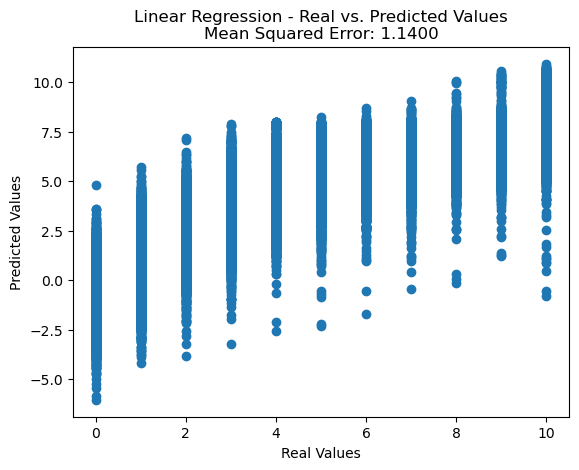

Decision Tree - Real vs. Predicted Values
 R Squared: 0.8829


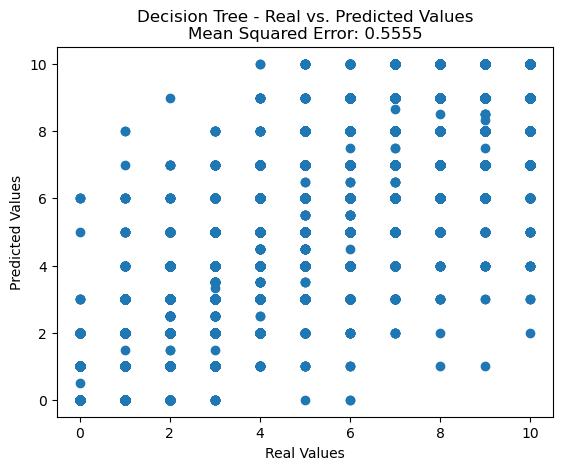

Random Forest - Real vs. Predicted Values
 R Squared: 0.9294


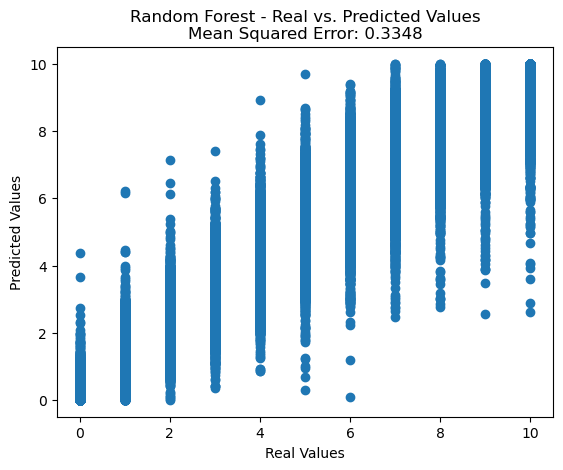

In [199]:
target_column = 'price'
features = df_cleaned.drop(columns=[target_column])
target = df_cleaned[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Define regressors
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    #'Neural Network': MLPRegressor()
}

# Loop through regressors, train models, and print performance metrics
for name, regressor in regressors.items():
    # Train the model
    regressor.fit(X_train, y_train)

    # Make predictions
    predictions = regressor.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Plot real vs. predicted values
    plt.scatter(y_test, predictions)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title(f"{name} - Real vs. Predicted Values\nMean Squared Error: {mse:.4f}")
    print(f"{name} - Real vs. Predicted Values\n R Squared: {r2:.4f}")
    plt.show()

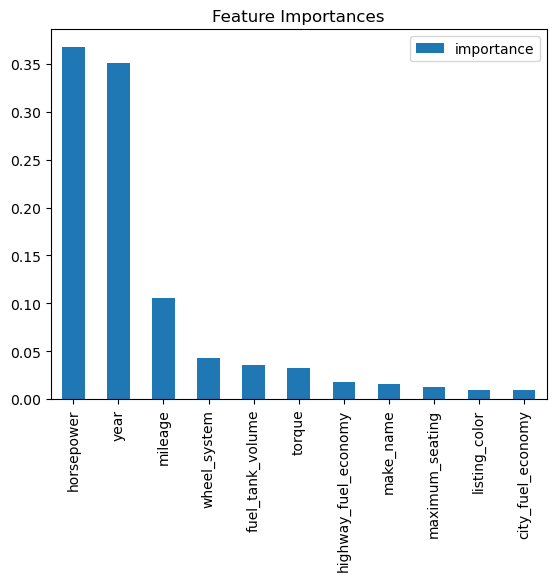

In [200]:
importances = regressor.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['importance']).sort_values('importance', ascending=False)

# Plot the feature importances
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

In [201]:
selected_columns = ['horsepower','year','mileage','wheel_system','price']
df_3_var = df2_filtered[selected_columns]

Linear Regression - Real vs. Predicted Values
 R Squared: 0.7287


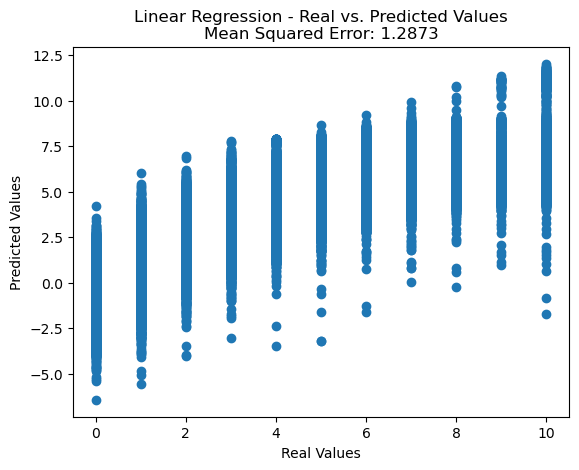

Decision Tree - Real vs. Predicted Values
 R Squared: 0.8100


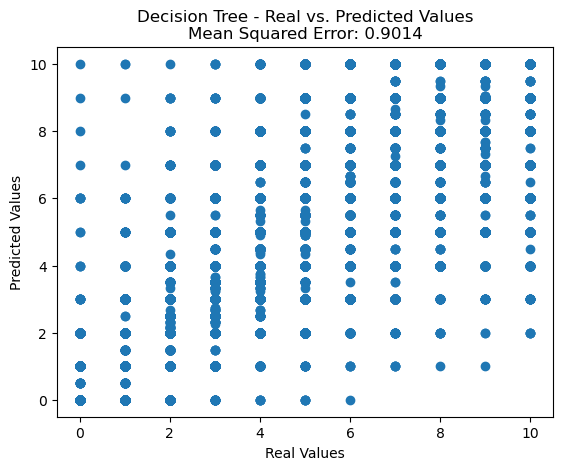

Random Forest - Real vs. Predicted Values
 R Squared: 0.8687


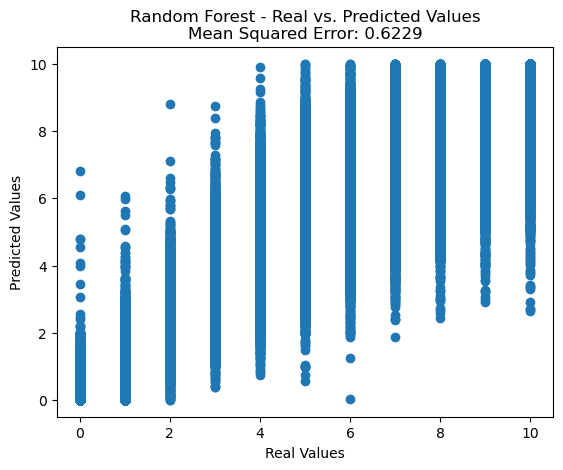

In [202]:
target_column = 'price'
features = df_3_var.drop(columns=[target_column])
target = df_3_var[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Define regressors
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    #'Neural Network': MLPRegressor()
}

# Loop through regressors, train models, and print performance metrics
for name, regressor in regressors.items():
    # Train the model
    regressor.fit(X_train, y_train)

    # Make predictions
    predictions = regressor.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Plot real vs. predicted values
    plt.scatter(y_test, predictions)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title(f"{name} - Real vs. Predicted Values\nMean Squared Error: {mse:.4f}")
    print(f"{name} - Real vs. Predicted Values\n R Squared: {r2:.4f}")
    plt.show()

In [203]:
predictions

array([0.99, 1.02, 4.51, ..., 6.52, 4.07, 4.26])

In [204]:
predictions_int = [round(num) for num in predictions]


In [205]:
mse = mean_squared_error(y_test, predictions_int)
r2 = r2_score(y_test, predictions_int)

In [206]:
mse, r2

(0.7166100195689974, 0.848985256649713)

Random Forest - Real vs. Predicted Values
 R Squared: 0.8490


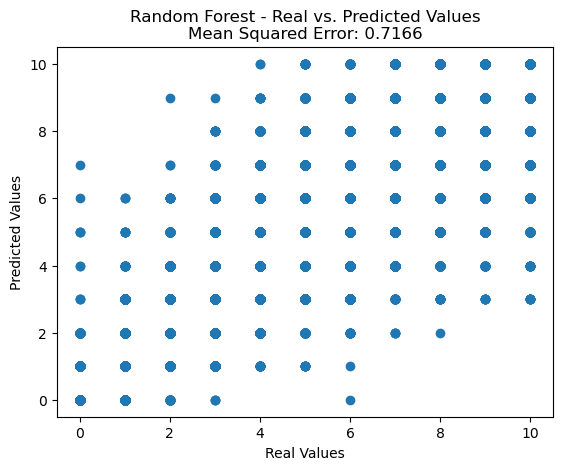

In [211]:
plt.scatter(y_test, predictions_int)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title(f"{name} - Real vs. Predicted Values\nMean Squared Error: {mse:.4f}")
print(f"{name} - Real vs. Predicted Values\n R Squared: {r2:.4f}")
plt.show()